In [3]:
import cv2
from PIL import Image
import numpy as np
from scipy import ndimage
from skimage.feature import peak_local_max
from skimage.morphology import watershed
import matplotlib.pyplot as plt
import sys
import math

[[212 212 212 ... 177 199 181]
 [212 212 212 ... 166 192 172]
 [212 212 212 ... 166 197 173]
 ...
 [130 109 141 ...  81  75 100]
 [134 116 144 ... 101  98 130]
 [124 109 136 ...  86  83 139]]


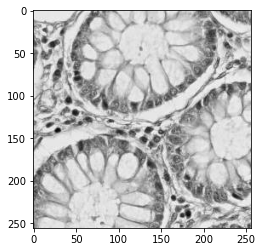

In [94]:
image = cv2.imread("C:/Users/etuna/Desktop/HW2/dataset/dataset/training/tr4.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print(gray)
plt.imshow(gray, cmap="gray")
plt.show()


In [5]:
def checkCoords(rows, cols, fIx, fIy, sIx, sIy):
    return fIx >= 0 and fIy >= 0 and fIx <= (rows - 1) and fIy <= (cols - 1) and sIx >= 0 and sIy >= 0 and sIx <= (rows - 1) and sIy <= (cols - 1)

In [60]:
np.set_printoptions(threshold=sys.maxsize)

In [92]:
def calculateCooccurrenceMatrix(grayImg, binNumber, di, dj):
    rows, cols = grayImg.shape
    #Groups
    thr = 256/binNumber
    for r in range(rows):
        for c in range(cols):
            grayImg[r][c] = (int(grayImg[r][c]/thr) + 1 )*thr - 1

    bins = {}
    for r in range(rows):
        for c in range(cols):
            fIx = r + di
            fIy = c + dj
            sIx = r + 1 + di
            sIy = c + 1 + dj
            if not checkCoords(rows, cols, fIx, fIy, sIx, sIy):
                continue
            fpx = grayImg[fIx][fIy]
            spx = grayImg[sIx][sIy]
            if (fpx, spx) in bins:
                bins[(fpx, spx)] += 1
            else:
                bins[(fpx, spx)] = 1
            
    
    arr2Img = np.zeros(shape = (256, 256))
    for key, val in bins.items():
        arr2Img[key[0]][key[1]] = val
    
    im = Image.fromarray(np.uint8(arr2Img))
    plt.imshow(im)
    plt.show()
    return arr2Img
    

229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
203
178
152
152
203
229
203
178
152
127
152
178
203
229
229
229
229
229
229
152
152
127
127
152
178
203
152
101
178
203
178
178
127
127
127
127
127
152
178
152
152
178
178
152
127
127
127
152
178
203
203
203
229
229
203
203
203
203
203
229
229
229
229
229
203
203
178
178
178
203
203
229
203
203
203
229
203
203
203
203
203
203
203
178
178
178
203
203
203
203
203
203
203
203
203
203
203
203
229
229
229
203
229
229
203
178
152
203
203
229
229
229
229
229
229
229
229
229
229
229
229
178
152
152
178
178
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
152
152
127
127
101
101
127
127
101
127
152
152
178
152
152
152
178
229
229
229
178
178
178
152
152
178
178
152
101
75
101
127
101
101
127
127
127
127
101
127
127
152
127
127
127
101
127
178
178
178
152
152
152
178
152
152
152
127
127
1

152
127
127
178
178
178
152
152
152
101
152
127
178
178
203
203
229
229
229
229
229
229
203
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
203
203
178
152
127
127
152
152
152
152
178
152
152
152
203
229
229
229
229
229
203
203
203
178
127
101
101
101
101
101
101
127
152
203
229
229
229
203
229
229
229
229
203
203
178
152
152
152
178
178
178
203
229
229
229
229
203
203
203
229
229
203
203
203
203
203
178
178
178
203
203
203
203
203
203
203
178
203
203
203
203
203
203
229
229
229
229
229
229
229
229
229
203
203
127
127
152
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
229
203
203
178
152
152
178
178
152
178
178
178
178
178
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
178
178
178
178
152
178
203
203
203
203
203
203
203
203
203
178
178
203
203
178
127
127
127
127
127
127
203
229
229
229
229
229
229
229
229
229
229
229
229
229
203
203
178
152
152
152
178
203


178
178
178
203
203
178
178
178
178
203
203
203
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
203
229
229
203
203
178
178
203
229
229
203
229
203
229
178
152
101
75
101
127
152
203
229
229
229
229
203
178
152
152
152
152
178
229
229
229
229
178
127
101
101
127
127
152
178
178
203
203
203
229
229
229
229
229
229
229
203
203
178
152
152
152
127
127
152
152
127
127
127
152
152
152
178
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
178
178
178
203
178
178
178
178
178
178
178
203
203
203
203
203
203
229
229
203
203
178
178
178
203
203
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
203
229
229
229
203
203
229
203
203
203
203
203
203
203
229
229
203
229
229
229
229
203
203
178
178
178
152
178
178
203
203
203
203
203
229
229
229
229
229
229
229
229
203
203
229
229
229
229
229
203
203
203
203
203
203
178
203
203
203
203
178
178
178
178
178
178
178
178
178
152
178
203
203
178
178
152
127
127
127
127
127
127
152
152
152
127
1

178
203
203
203
203
203
203
229
203
203
178
178
203
203
152
127
127
152
178
203
203
203
203
178
127
152
152
178
178
152
178
203
178
178
178
178
178
178
178
178
203
127
127
178
152
127
152
178
178
229
203
152
127
101
101
101
127
152
178
203
229
229
229
229
203
203
229
229
203
178
178
178
178
178
178
178
152
178
229
229
229
229
229
229
229
203
229
229
229
203
178
152
127
152
152
152
127
127
152
152
152
152
152
152
152
152
178
178
178
203
203
203
229
203
203
203
203
229
229
229
229
229
229
229
229
229
229
229
229
203
203
203
178
178
178
203
203
229
203
203
229
229
203
203
203
203
229
229
229
229
203
203
229
203
203
229
229
229
229
229
229
229
229
229
229
229
229
229
203
203
203
203
229
229
229
229
229
229
229
229
229
229
229
229
203
229
229
229
229
229
203
203
203
203
203
203
203
203
229
229
229
229
229
229
229
229
229
203
203
229
203
203
229
229
229
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
178
178
178
178
152
152
127
127
152
152
152
152
152
127
127
101
101
101
101


203
203
203
203
203
203
178
152
152
152
178
203
203
203
203
178
178
203
229
229
203
203
203
203
178
152
127
101
101
101
75
152
203
229
229
229
203
203
178
178
178
152
178
229
229
229
229
203
178
203
203
203
127
127
127
101
75
101
127
152
127
127
152
152
178
203
203
229
229
229
229
203
229
229
203
152
152
178
152
178
203
229
229
229
229
229
229
229
229
229
229
229
229
229
203
229
229
229
203
178
178
178
152
178
178
203
203
203
229
229
229
229
229
229
229
229
229
229
229
229
229
229
203
229
229
229
203
203
203
203
203
178
152
178
203
229
229
229
229
203
229
203
203
203
203
203
229
229
229
229
229
229
203
203
229
229
229
229
203
203
203
203
203
203
203
152
152
152
178
203
203
203
203
229
203
203
203
203
203
229
229
203
203
203
203
229
229
229
229
229
229
229
229
229
203
203
178
178
178
178
152
152
152
178
178
178
178
178
152
127
127
101
127
127
127
152
127
101
101
101
101
178
178
229
229
229
229
203
203
178
178
127
101
127
101
101
75
101
127
152
178
203
203
203
203
203
178
178
178
178
178

229
203
229
203
203
127
203
178
152
152
152
178
152
152
178
229
229
229
229
229
229
229
229
229
229
229
229
229
229
203
203
203
203
203
203
127
127
127
127
152
203
203
178
178
152
127
127
127
101
101
127
127
127
152
152
203
229
203
203
203
229
229
203
203
203
203
229
229
229
203
152
178
203
203
229
203
178
203
178
127
101
101
101
127
127
127
127
127
152
152
127
152
152
152
127
178
203
203
229
229
229
229
229
229
229
229
229
229
229
203
203
178
178
178
178
178
178
178
178
178
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
178
203
203
203
203
229
229
229
229
229
229
229
229
229
229
229
229
229
203
203
203
203
229
229
203
203
229
229
203
203
203
203
203
203
203
203
203
229
229
229
203
203
203
203
203
203
203
203
203
178
178
178
203
203
203
203
203
229
229
229
229
229
203
203
203
203
203
203
178
178
178
178
203
203
203
229
229
229
203
203
229
229
229
229
229
229
229
229
203
203
178
178
178
178
178
178
178
178
127
127
127
127
127
101
127
127
152
152
178
178


152
152
101
101
127
152
127
203
203
152
178
152
152
152
178
152
127
101
101
127
101
127
152
178
203
203
178
178
152
178
203
229
229
229
229
229
229
203
203
178
178
203
178
152
127
101
101
101
127
178
203
229
229
203
203
178
152
101
101
101
101
101
101
152
178
229
229
203
178
152
127
152
178
203
203
152
127
101
178
152
127
127
101
127
178
203
229
203
203
229
229
229
229
229
229
203
203
203
229
229
203
178
152
152
152
152
152
152
152
178
178
178
178
178
203
203
203
203
203
229
229
229
203
203
203
203
203
203
203
178
152
152
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
178
152
152
152
127
152
178
178
203
203
203
203
203
203
229
229
229
229
229
229
203
203
203
203
203
178
178
203
229
229
203
229
229
203
229
203
203
203
203
229
229
203
203
203
203
203
203
203
203
203
178
178
178
203
203
203
203
178
178
178
152
152
152
178
152
152
152
152
152
152
152
152
152
127
127
127
127
127
127
127
127
152
178
229
229
229
203
152
152
178
152
127
152
203
203
203
203


178
203
203
229
229
229
229
203
203
203
203
203
203
203
203
229
229
229
229
203
203
229
229
229
229
229
229
229
229
229
203
178
152
127
152
178
178
152
178
152
203
229
229
203
127
101
101
75
75
75
75
75
101
127
203
203
203
203
203
178
152
152
178
127
152
127
178
229
203
152
101
101
127
127
127
127
152
178
203
229
229
229
229
229
229
229
203
203
229
229
229
203
203
152
152
152
178
178
178
203
229
229
229
203
203
203
203
203
203
203
203
203
203
203
229
229
203
178
127
127
178
229
229
203
203
229
229
229
229
229
229
203
203
203
178
178
178
178
152
127
178
178
203
229
229
229
229
229
229
229
229
229
203
229
229
203
178
127
152
203
203
203
203
229
203
203
229
229
229
229
229
229
203
203
203
203
178
178
178
203
203
203
203
229
229
229
229
203
203
229
229
229
203
203
203
229
203
203
203
178
178
178
152
152
152
127
127
127
178
178
152
152
127
127
127
127
127
127
152
203
229
229
229
229
229
229
229
229
203
203
178
152
152
203
229
229
229
203
229
178
101
127
152
152
152
101
101
152
203
229
229
2

127
127
127
127
127
152
203
229
229
203
229
229
229
229
229
229
229
229
229
203
178
152
127
127
152
178
203
178
203
229
229
229
203
229
229
229
229
229
229
229
203
178
178
152
152
178
178
178
178
178
178
203
178
152
127
152
152
152
127
127
127
101
101
75
101
101
101
101
101
152
203
178
152
127
127
229
203
203
203
203
203
203
203
203
203
178
152
152
178
178
203
203
203
229
229
229
203
203
178
127
152
152
203
203
178
178
178
178
203
152
203
229
203
229
203
178
127
101
127
127
178
203
229
203
203
203
178
152
127
101
101
101
127
152
178
178
178
152
127
152
127
127
178
178
178
152
152
152
152
178
178
178
203
203
178
203
203
229
203
203
203
178
178
178
203
203
152
127
127
152
178
178
203
203
203
203
229
229
203
229
203
203
229
229
229
229
229
203
203
203
203
178
178
203
203
178
203
203
203
203
203
203
203
203
203
203
229
229
203
203
178
178
152
127
203
229
229
229
229
229
229
203
203
229
229
229
229
229
203
203
203
203
203
178
152
152
152
178
203
203
203
229
229
229
203
203
203
152
127
101
1

152
127
127
127
152
178
178
203
203
203
178
101
101
101
127
127
127
152
152
152
152
178
178
178
178
178
152
152
152
178
152
152
152
152
178
229
229
229
203
203
229
229
203
178
178
178
152
127
127
127
152
178
178
203
203
203
203
229
203
203
178
178
152
152
178
203
203
203
203
178
178
178
203
203
203
178
152
152
152
178
203
203
203
178
203
203
178
203
229
229
203
229
203
178
152
127
127
127
152
152
127
152
178
178
178
152
127
127
152
152
101
101
152
127
178
203
203
178
101
101
101
101
127
152
203
203
178
152
152
152
152
127
127
152
178
178
178
203
203
203
203
203
229
203
203
203
178
178
203
178
178
178
203
203
229
229
229
229
229
229
203
203
229
229
229
229
229
203
178
178
127
127
152
152
203
203
178
178
178
178
152
152
152
152
152
178
178
203
203
203
178
178
178
203
152
127
101
127
127
127
101
101
127
152
127
101
101
127
178
203
203
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
203
229
229
178
127
127
152
178
229
229
229
229
229
229
203
203
203
178
152
127
101
127
152
127


152
178
178
152
152
152
178
178
178
178
178
178
178
203
203
203
178
178
178
178
178
203
229
229
229
229
229
229
229
229
229
229
203
229
229
178
152
152
178
203
203
203
203
203
178
178
178
127
127
229
203
203
178
127
152
152
178
203
178
178
178
178
203
229
229
229
229
229
203
203
203
152
127
127
152
203
203
203
203
178
178
178
203
203
178
152
127
101
101
101
127
127
152
178
203
178
152
152
152
152
152
127
127
127
127
152
203
229
229
203
203
203
203
229
203
178
127
101
101
101
127
127
127
152
178
178
203
178
127
75
75
75
75
101
127
152
203
203
178
127
152
127
127
127
127
152
127
101
152
178
152
152
152
152
152
152
152
152
178
178
178
127
101
101
101
101
101
101
101
127
152
152
178
178
203
152
127
152
178
152
101
101
127
127
127
101
101
101
152
203
152
101
127
127
101
127
101
127
152
229
178
203
229
229
229
229
203
203
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
203
203
178
152
152
152
178
178
203
229
203
229
203
152
127
101
75
75
101
152
229
203
101
101
101
127
12

152
152
152
127
127
127
152
152
178
178
152
127
127
127
152
152
152
178
178
178
178
178
178
203
203
203
203
203
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
203
229
229
229
229
229
229
229
229
229
203
203
203
203
178
152
152
178
178
152
152
152
178
203
229
203
178
152
178
178
127
127
127
152
152
127
152
152
152
152
152
152
152
127
178
127
152
152
178
178
178
178
152
152
152
152
152
152
178
203
178
178
178
203
203
203
203
203
203
203
203
203
203
203
178
152
178
203
229
229
229
229
229
229
229
229
229
229
229
229
203
203
203
203
127
127
229
229
229
229
229
229
229
229
229
178
178
203
203
203
203
203
203
152
152
152
152
152
152
152
152
152
152
152
152
152
203
229
203
229
203
203
203
203
203
178
178
152
127
178
152
127
127
152
178
152
178
178
178
203
178
75
50
50
75
50
75
75
101
152
203
178
127
101
152
152
178
178
152
178
152
152
178
203
203
229
229
203
229
229
229
229
229
229
229
229
203
203
229
229
203
178
178
127
178
203
152
152
152
178
178
229
229
229
203
178
178

229
152
127
127
127
152
152
152
152
152
152
127
152
178
152
152
152
152
152
152
178
152
152
152
152
152
152
152
178
178
178
203
203
203
203
203
203
203
203
203
178
178
152
127
152
178
203
203
229
229
203
203
229
229
229
229
229
229
229
229
229
229
203
203
203
203
229
229
229
229
229
229
229
229
229
229
203
203
178
178
178
203
203
229
229
229
152
127
101
127
178
203
203
203
229
203
178
152
152
178
203
229
203
203
203
178
152
152
152
152
178
178
178
178
203
178
203
178
203
203
203
203
152
101
75
75
75
75
101
101
101
101
101
101
127
127
152
178
152
101
75
101
101
127
152
152
127
127
127
127
101
101
127
101
101
127
203
203
203
229
203
178
152
178
178
178
203
178
178
203
203
203
178
127
152
101
101
75
101
127
101
178
178
203
203
203
229
229
203
203
203
229
229
203
203
203
229
229
203
203
178
152
152
178
203
178
203
178
178
178
203
203
203
178
178
203
203
178
178
152
152
127
127
127
152
178
203
203
203
178
127
101
127
101
127
152
101
178
203
203
229
229
203
229
229
229
229
229
229
203
203
17

203
203
203
229
229
229
229
229
229
229
229
229
229
229
203
229
178
152
178
178
152
152
152
178
178
203
203
203
229
229
229
229
229
229
229
203
203
203
178
178
178
127
50
50
50
50
75
75
127
178
203
178
178
152
178
178
203
178
203
203
203
203
229
229
203
203
203
229
229
229
229
203
203
229
203
203
203
203
203
203
203
203
203
203
203
203
203
229
229
229
229
229
229
229
203
203
229
229
229
203
203
203
203
203
203
203
178
152
152
152
127
152
152
127
101
75
75
75
75
75
75
101
127
152
178
203
203
178
178
127
101
75
75
75
101
127
127
127
127
127
127
152
203
203
203
203
152
101
75
75
75
75
75
101
101
152
203
229
229
229
229
229
203
127
101
152
127
101
75
101
101
101
127
127
152
178
203
203
152
101
127
101
101
178
152
152
178
178
152
127
152
178
152
152
152
178
203
203
203
203
203
203
203
203
203
203
203
203
229
203
203
203
203
203
203
203
178
178
178
178
152
152
127
127
178
203
229
203
203
229
229
203
203
229
229
229
229
229
229
229
229
229
203
203
203
203
203
229
203
203
203
203
203
203
203
2

203
229
229
229
229
229
203
203
203
203
229
229
229
203
229
229
229
229
229
229
203
203
178
178
178
203
203
152
101
101
101
127
203
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
203
203
229
229
229
203
203
203
229
229
203
178
127
127
127
127
127
127
127
101
101
101
101
101
127
127
127
127
101
101
127
152
127
152
127
127
127
127
127
101
127
152
203
203
203
127
127
152
152
127
127
127
127
127
127
152
152
152
127
101
101
101
101
101
101
127
152
178
178
203
203
203
203
203
203
203
203
203
203
178
178
152
127
127
127
75
75
75
101
75
101
152
178
178
178
152
152
152
127
101
101
101
101
127
101
127
152
203
178
229
203
178
178
178
178
178
178
127
127
101
127
127
101
127
127
127
127
127
101
127
127
152
152
178
178
178
203
203
178
152
127
152
178
178
203
203
203
203
229
229
229
229
203
203
203
229
229
203
203
203
203
203
203
178
178
152
178
203
203
203
229
229
229
229
229
229
229
229
229
203
203
203
203
203
229
229


203
203
178
152
178
178
152
203
203
229
229
229
229
229
229
229
229
229
229
229
203
203
203
203
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
203
203
152
127
152
203
203
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
203
203
178
178
178
152
127
127
152
127
127
127
127
152
152
152
127
127
152
178
203
203
203
203
178
152
101
75
75
101
101
152
152
152
152
127
127
127
127
178
203
178
178
178
178
178
203
178
178
178
178
152
152
152
152
152
152
152
152
152
178
178
203
203
203
178
152
203
178
152
152
152
152
152
178
178
152
127
101
101
127
152
152
152
178
178
178
178
203
203
203
178
152
127
127
127
101
101
127
178
203
203
203
178
178
203
178
203
203
178
203
203
178
152
178
152
152
127
127
152
178
178
152
101
152
203
203
229
203
152
127
127
127
127
178
152
178
178
203
127
101
101
75
101
101
127
152
203
203
178
178
178
178
178
203
203
203
203
203
203
203
203
203
203
203
229
229
229
229
229
229
229

178
203
203
203
203
203
229
229
229
229
229
229
229
229
229
229
229
203
203
203
203
203
203
178
178
203
203
203
178
178
178
152
178
178
178
127
152
178
178
203
229
229
229
229
229
203
203
203
203
178
178
178
203
178
152
152
152
152
152
152
178
178
178
178
203
203
203
178
229
229
229
229
229
203
203
203
229
229
229
203
203
203
203
203
178
152
101
101
127
127
127
152
152
127
152
178
178
178
152
127
127
127
101
127
152
152
152
178
203
178
178
203
203
203
203
203
178
127
152
152
203
203
229
229
229
229
229
229
203
203
203
152
152
152
178
229
229
229
229
229
203
203
229
229
229
229
229
203
229
229
203
178
127
152
152
127
178
229
229
229
229
229
203
229
229
229
229
203
152
127
178
203
203
229
229
203
229
229
229
229
229
229
203
203
229
229
229
229
229
203
203
152
101
127
101
75
152
178
152
152
178
203
152
127
127
127
127
152
178
203
178
152
203
178
203
203
178
203
203
178
152
203
229
203
203
203
178
178
152
152
178
152
127
101
127
101
127
101
152
152
127
127
152
152
152
178
152
178
203
203
2

203
178
152
127
152
178
203
203
203
203
203
229
203
178
152
178
152
127
101
101
101
127
127
127
152
178
178
178
178
178
178
178
178
178
178
152
152
203
229
229
178
178
152
152
152
127
127
127
127
127
152
152
127
127
152
127
152
178
178
178
203
203
178
203
203
178
178
178
178
178
152
152
178
178
178
203
203
203
203
203
178
178
178
178
178
203
203
203
203
229
229
229
229
229
203
203
203
203
229
229
203
229
229
229
203
178
178
178
203
203
203
203
203
203
203
178
178
178
178
203
229
229
229
229
229
229
229
229
229
229
229
229
203
203
152
229
203
203
229
203
178
152
127
127
127
127
101
127
152
152
101
101
152
152
127
127
152
178
152
178
178
203
203
203
229
229
203
203
203
178
178
152
178
178
178
178
203
229
229
203
203
229
229
229
229
229
229
229
229
203
178
152
178
203
203
203
203
203
203
203
178
152
152
152
203
203
229
203
229
229
203
203
229
229
229
203
203
203
178
152
178
203
203
203
203
203
203
203
203
203
178
178
152
178
203
229
229
229
229
229
229
229
229
229
229
229
229
229
229
203


229
229
229
203
152
101
101
127
152
152
127
127
127
178
152
152
203
229
203
229
203
229
229
229
229
229
203
203
203
178
152
127
127
152
178
203
203
203
203
203
203
178
178
203
178
178
178
178
203
203
203
229
203
203
229
229
229
229
229
229
229
229
229
229
229
203
203
178
178
178
178
203
203
203
203
203
203
203
203
203
178
178
152
152
178
178
178
203
203
203
203
229
203
203
203
203
203
203
203
203
203
203
152
152
152
152
178
178
203
203
203
203
203
203
203
203
203
178
152
152
152
152
152
178
203
178
178
178
203
203
178
178
178
178
178
152
152
152
178
178
203
203
178
152
152
152
127
127
101
101
127
101
152
203
203
152
127
152
127
75
101
101
101
75
101
152
178
203
178
203
203
203
178
152
152
178
178
178
152
178
178
152
101
101
75
75
75
75
127
152
178
152
127
127
127
178
229
178
178
203
203
203
203
203
203
178
178
152
152
152
178
178
203
229
229
229
229
203
203
203
203
203
203
203
203
203
203
203
203
203
203
178
178
178
152
178
178
203
203
178
178
178
203
203
178
178
152
127
127
178
203
17

101
127
203
203
152
127
127
152
127
127
127
178
152
152
152
178
152
178
152
178
203
178
152
127
127
152
178
152
178
178
178
152
152
152
152
152
127
178
229
229
203
178
127
152
152
127
127
127
152
203
152
152
152
127
152
152
178
203
127
101
127
152
152
127
101
127
127
152
178
178
152
152
178
203
229
229
203
229
229
229
229
203
203
229
229
203
203
203
203
203
203
229
229
203
203
178
152
152
152
152
178
178
203
178
152
178
203
203
203
203
203
203
229
229
229
229
229
203
203
229
229
229
229
203
203
229
229
229
229
229
229
229
229
203
229
229
229
203
203
203
203
203
203
203
203
203
203
203
203
178
178
178
178
178
203
203
203
203
203
203
203
203
203
203
203
203
203
203
178
178
178
178
203
203
203
203
178
178
203
203
178
152
152
152
152
178
178
178
152
152
152
178
178
178
178
203
178
178
178
178
178
152
127
127
101
101
101
75
75
101
127
203
229
229
229
229
203
203
203
178
203
203
178
152
152
203
229
229
229
229
229
203
178
203
203
229
229
203
152
127
101
101
101
127
178
127
152
127
152
203
12

203
178
178
152
178
178
203
229
229
229
229
229
229
229
229
229
203
178
152
152
127
127
127
152
152
152
152
152
178
178
152
127
127
101
127
152
127
127
152
178
152
101
101
127
127
101
101
101
152
152
152
127
127
127
152
127
101
178
229
203
203
229
203
178
127
75
50
50
75
50
75
101
101
127
152
152
152
152
152
152
178
203
229
229
229
152
152
127
152
152
152
152
152
127
178
178
152
178
178
178
152
152
152
178
178
178
178
178
178
152
152
178
178
178
203
203
203
203
203
203
203
203
203
203
203
203
203
178
152
152
203
203
203
229
229
229
229
229
229
229
203
229
229
203
229
229
229
229
203
203
203
203
229
229
203
203
203
203
203
203
203
203
203
203
229
229
229
229
229
229
229
229
229
203
203
203
203
203
203
203
229
203
178
152
152
178
178
178
178
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
229
229
229
229
229
229
229
229
203
203
203
203
178
178
152
152
127
101
127
127
101
101
152
152
152
127
178
229
229
203
178
178
229
203
101
75
75
50
75
10

229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
178
178
152
178
203
203
203
229
229
229
229
229
229
229
229
229
229
229
229
229
229
229
203
178
152
152
152
127
127
127
101
127
127
152
152
152
152
178
178
152
152
152
152
127
101
127
127
101
101
127
127
178
152
101
127
203
229
203
178
229
203
178
178
203
229
229
229
203
178
127
127
127
127
152
152
127
127
127
127
101
75
127
127
152
203
229
229
229
203
203
178
203
229
203
203
178
178
203
203
203
178
203
152
152
178
203
203
178
178
203
178
178
178
178
178
178
178
152
152
178
178
203
203
229
229
229
229
229
229
229
229
229
229
229
229
229
229
203
178
178
203
229
203
203
178
178
152
127
127
127
127
127
127
127
152
203
229
178
152
152
203
178
178
203
178
203
178
178
178
203
178
178
203
203
203
203
203
203
203
229
229
229
203
203
203
229
229
229
229
203
203
203
203
203
203
178
178
152
152
178
203
229
229
229
229
203
203
203
203
203
203
203
229
203
203
203
229
229
229
229
229
229
229
229
229
229
229
229
203
203
203
229
229
203
229
2

50
75
152
203
229
229
203
203
229
178
178
152
152
152
178
178
152
152
152
152
152
127
127
127
152
152
178
203
203
203
203
229
203
229
229
203
203
203
229
203
178
101
101
101
127
152
178
203
229
203
178
152
152
152
152
101
101
101
152
178
203
203
203
203
203
229
203
203
203
178
152
152
152
152
152
152
152
178
203
178
178
152
152
152
152
127
127
127
127
127
152
152
178
178
152
178
178
203
203
203
203
203
203
203
203
203
203
203
203
203
178
178
178
178
178
203
203
203
203
229
229
229
229
229
203
203
203
203
229
229
229
229
229
229
229
229
229
203
203
203
203
178
178
178
203
178
178
178
178
152
152
178
203
229
229
229
229
203
203
203
203
203
203
203
203
203
203
203
203
203
203
203
152
127
127
152
152
178
178
203
203
178
203
203
229
229
203
203
203
203
229
229
229
229
229
203
203
229
229
229
203
229
229
229
229
229
203
203
229
203
203
178
178
203
203
203
152
127
101
101
127
127
101
101
101
127
178
229
229
229
229
203
203
178
152
152
127
101
127
152
152
127
178
203
203
152
101
75
75
75
101
1

178
152
152
152
152
152
152
127
152
178
178
152
127
152
152
152
127
127
152
152
152
178
229
229
229
229
229
178
178
178
127
127
152
203
203
203
203
229
229
229
203
229
229
152
101
101
127
178
178
203
178
152
152
127
127
127
152
152
178
178
178
178
203
203
203
203
203
203
229
229
229
229
229
229
229
229
229
229
229
229
203
178
178
178
178
203
203
203
152
152
152
152
152
127
101
101
127
152
152
152
178
203
203
152
127
127
127
127
152
152
152
152
178
203
203
203
203
229
203
178
203
203
152
101
75
101
127
152
127
152
152
152
178
178
203
203
203
229
229
229
229
229
229
229
229
229
229
203
203
229
229
229
229
229
229
229
229
229
229
229
229
229
229
203
203
203
203
203
203
203
203
229
229
229
229
229
229
229
229
229
229
203
203
203
229
229
229
229
229
229
203
229
229
229
203
203
203
203
203
203
229
229
229
229
229
229
229
203
203
203
203
229
229
229
229
203
203
203
203
203
178
152
127
152
203
203
203
203
203
203
203
203
203
203
203
229
229
229
229
203
203
229
229
203
203
203
203
203
203
203
2

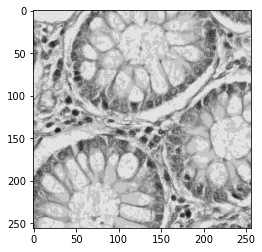

[[229 229 229 ... 178 203 203]
 [229 229 229 ... 178 203 178]
 [229 229 229 ... 178 203 178]
 ...
 [152 127 152 ... 101  75 101]
 [152 127 152 ... 101 101 152]
 [127 127 152 ... 101 101 152]]


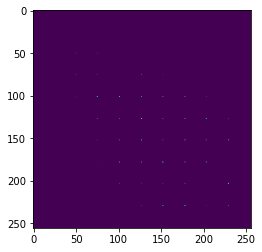

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
calculateCooccurrenceMatrix(gray,10 , 0,0)

In [87]:
def calculateAccumulatedCooccurrenceMatrix(grayImg, binNumber, d):
    dists = [(d, 0), (d, d), (0 , d), (-d, d), (-d, 0), (-d, -d), (0, -d), (d, -d)]
    arr = np.zeros(shape=(256, 256))
    for d in dists:
        arr += calculateCooccurrenceMatrix(grayImg, binNumber, d[0], d[1])
    im = Image.fromarray(np.uint8(arr))
    plt.imshow(im)
    plt.show()
    return arr
    

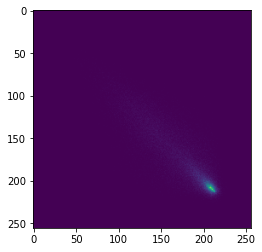

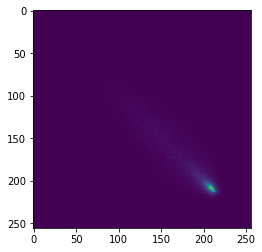

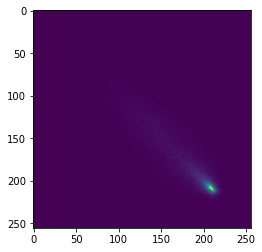

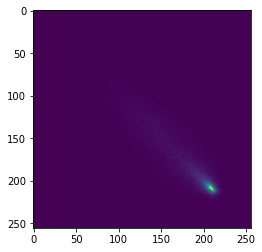

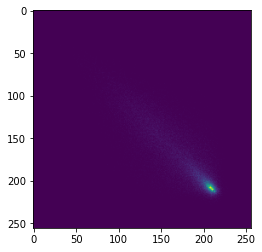

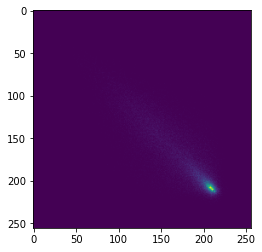

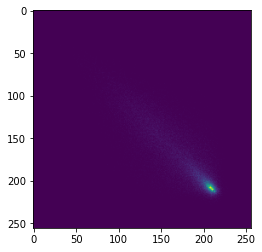

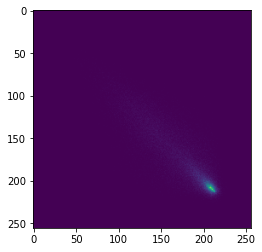

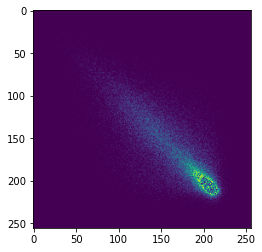

In [124]:
accM = calculateAccumulatedCooccurrenceMatrix(gray ,0, 1)

In [123]:
def calculateCooccurrenceFeatures(accM):
    accMNormalized = normalizeAccm(accM)
    asm = angularSecondMoment(accMNormalized)
    entr = entropy(accMNormalized)
    cont = contrast(accMNormalized)
    invDiff = inverseDiffMoment(accMNormalized)
    maxProb = maxProbability(accMNormalized)
    corr = correlation(accMNormalized)
    return asm, entr, cont, invDiff, maxProb, corr
    

In [118]:
def normalizeAccm(accM):
    rows, cols = accM.shape
    puv = 0
    for r in range(rows):
        for c in range(cols):
            puv += accM[r][c]
    for r in range(rows):
        for c in range(cols):
            accM[r][c] /= puv
            #if accM[r][c] > 0:
                #print(str(accM[r][c]))
    im = Image.fromarray(np.uint8(accM))
    plt.imshow(im)
    plt.show()
    return accM

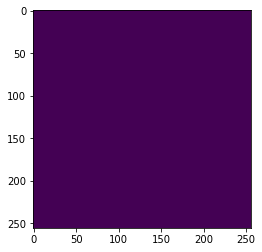

In [98]:
normalizeAccm(accM)

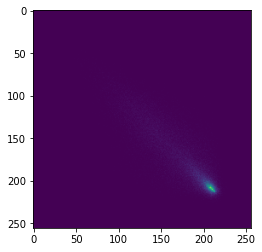

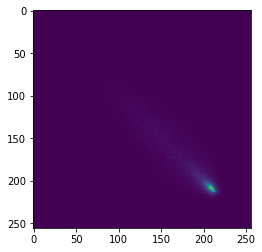

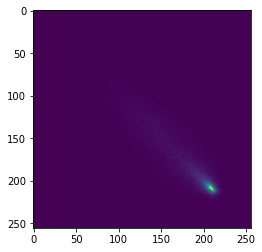

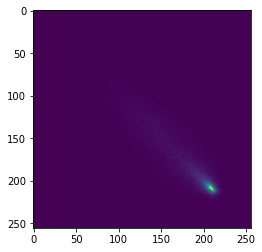

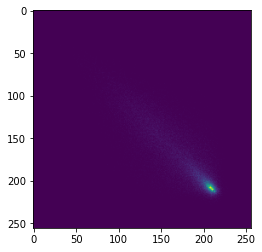

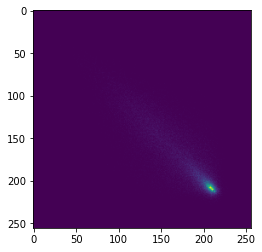

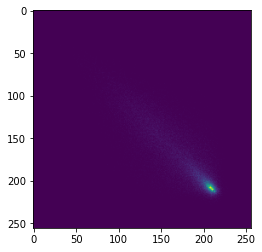

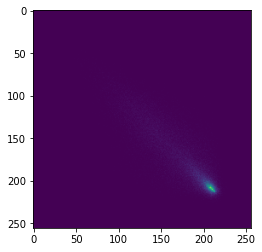

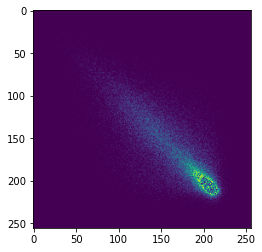

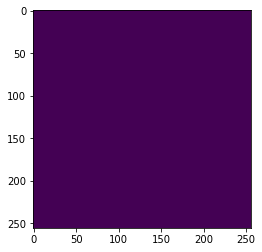

0.00046661287909084345 -8.708218581734902 0.0 0.11844031750395659 0.005880413595516233 167.34705573263523


In [147]:
accM = calculateAccumulatedCooccurrenceMatrix(gray ,0, 1)
a,b,c,d,e,f = calculateCooccurrenceFeatures(accM)
print(str(a),str(b),str(c),str(d),str(e),str(f))

In [141]:
def angularSecondMoment(accMNorm):
    rows, cols = accMNorm.shape
    asm = 0
    for r in range(rows):
        for c in range(cols):
            asm += math.pow(accMNorm[r][c], 2)
    return asm

In [142]:
def entropy(accMNorm):
    rows, cols = accMNorm.shape
    entr = 0
    for r in range(rows):
        for c in range(cols):
            if accMNorm[r][c] == 0:
                continue
            entr += accMNorm[r][c] * math.log(accMNorm[r][c])
    return entr

In [143]:
def contrast(accMNorm):
    rows, cols = accMNorm.shape
    cont = 0
    for r in range(rows):
        for c in range(cols):
            cont = accMNorm[r][c] * (r-c)
    return cont

In [144]:
def inverseDiffMoment(accMNorm):
    rows, cols = accMNorm.shape
    idm = 0
    for r in range(rows):
        for c in range(cols):
            idm += accMNorm[r][c] / (1 + math.pow((r - c), 2))
    return idm

In [145]:
def maxProbability(accMNorm):
    rows, cols = accMNorm.shape
    maxProb = 0
    for r in range(rows):
        for c in range(cols):
            if accMNorm[r][c] > maxProb:
                maxProb = accMNorm[r][c]
    return maxProb

In [146]:
def correlation(accMNorm):
    rows, cols = accMNorm.shape
    Ux = []
    Uy = []
    for r in range(rows):
        ux = 0
        for c in range(cols):
            ux += accMNorm[r][c]
        Ux.append(ux)
    for c in range(cols):
        uy = 0
        for r in range(rows):
            uy += accMNorm[r][c]
        Uy.append(uy)
    
    sigX = []
    sigY = []
    for r in range(rows):
        sigx = 0
        for c in range(cols):
            sigx += math.pow((r - Ux[r]), 2)*accMNorm[r][c]
        sigX.append(math.sqrt(sigx))
    for c in range(cols):
        sigy = 0
        for r in range(rows):
            sigy += math.pow((r - Uy[c]), 2)*accMNorm[r][c]
        sigY.append(math.sqrt(sigy))
    
    
    corr = 0
    for r in range(rows):
        for c in range(cols):
            if sigX[r] == 0 or sigY[c] == 0:
                continue
            corr += ( (r-Ux[r]) / sigX[r] ) * ( (c-Uy[c]) / sigY[c] ) * accMNorm[r][c]
    return corr